# **Credit Card Fraud Detection**

***Context***  
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.  
  
***Content Dataset***  
The dataset contains transactions made by credit cards in September 2013 by European cardholders.  
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  
  
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  
  
Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.  
  
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.  

Credit Card Fraud is one of the biggest issues faced by the government and the amount of money involved in this is generally enormous. Fraud may happen are as follows:
1. Firstly and most ostensibly when your card details are overseen by some other person.
2. When your card is lost or stolen and the person possessing it knows how to get things done.
3. Fake phone call convincing you to share the details.
4. And lastly and most improbably, a high-level hacking of the bank account details.

Main challenges involved in credit card fraud detection are:
1. Enormous Data is processed every day and the model build must be fast enough to respond to the scam in time.
2. Imbalanced Data i.e most of the transactions(99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones
3. Data availability as the data is mostly private.
4. Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.
5. And last but not the least, Adaptive techniques used against the model by the scammers.  
  
How to tackle these challenges?  
1. The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.
2. Imbalance can be dealt with by properly using some methods which we will talk about in the next paragraph
3. For protecting the privacy of the user the dimensionality of the data can be reduced.
4. A more trustworthy source must be taken which double-check the data, at least for training the model.
5. We can make the model simple and interpretable so that when the scammer adapts to it with just some tweaks we can have a new model up and running to deploy.  

Dealing with Imbalance  
We will see in the later parts of the article that the data we received is highly imbalanced i.e only 0.17% of the total Credit Card transaction is fraudulent. Well, a class imbalance is a very common problem in real life and needs to be handled before applying any algorithm to it.  
  
There are three common ways to deal with the imbalance of Data  
  
- Undersampling- One-sided sampling by Kubat and Matwin(ICML 1997)
- Oversampling-SMOTE(Synthetic Minority Oversampling Technique)
- Combining the above two.  

The imbalance is not within the scope of this article. Here is another article guiding you to deal with this problem specifically.  
  
For those of you who are wondering if the fraudulent transaction is so rare why even bother, well here is another fact. The amount of money involved in the fraudulent transaction reaches Billions of USD and by increasing the specificity to 0.1% we can save Millions of USD. Whereas higher Sensitivity means fewer people harassed.  

Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud  

# **Load dataset**

In [ ]:
import pandas_profiling as pdp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import joblib
%matplotlib inline
# Model

# Isolation forest
# Logistic Regression
# Logistic Regression CV
# Bernoulli Naive Bayes Classifier
# RandomForestClassifier
# BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
# XGBClassifier
# import tensorflow as tf

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score, classification_report, matthews_corrcoef
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, IsolationForest
from xgboost import XGBClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# # GPU
# print("Are we using GPU?: ", torch.cuda.is_available())
# print("the GPU name is: ",torch.cuda.get_device_name(0))

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Fraud detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **EDA**

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


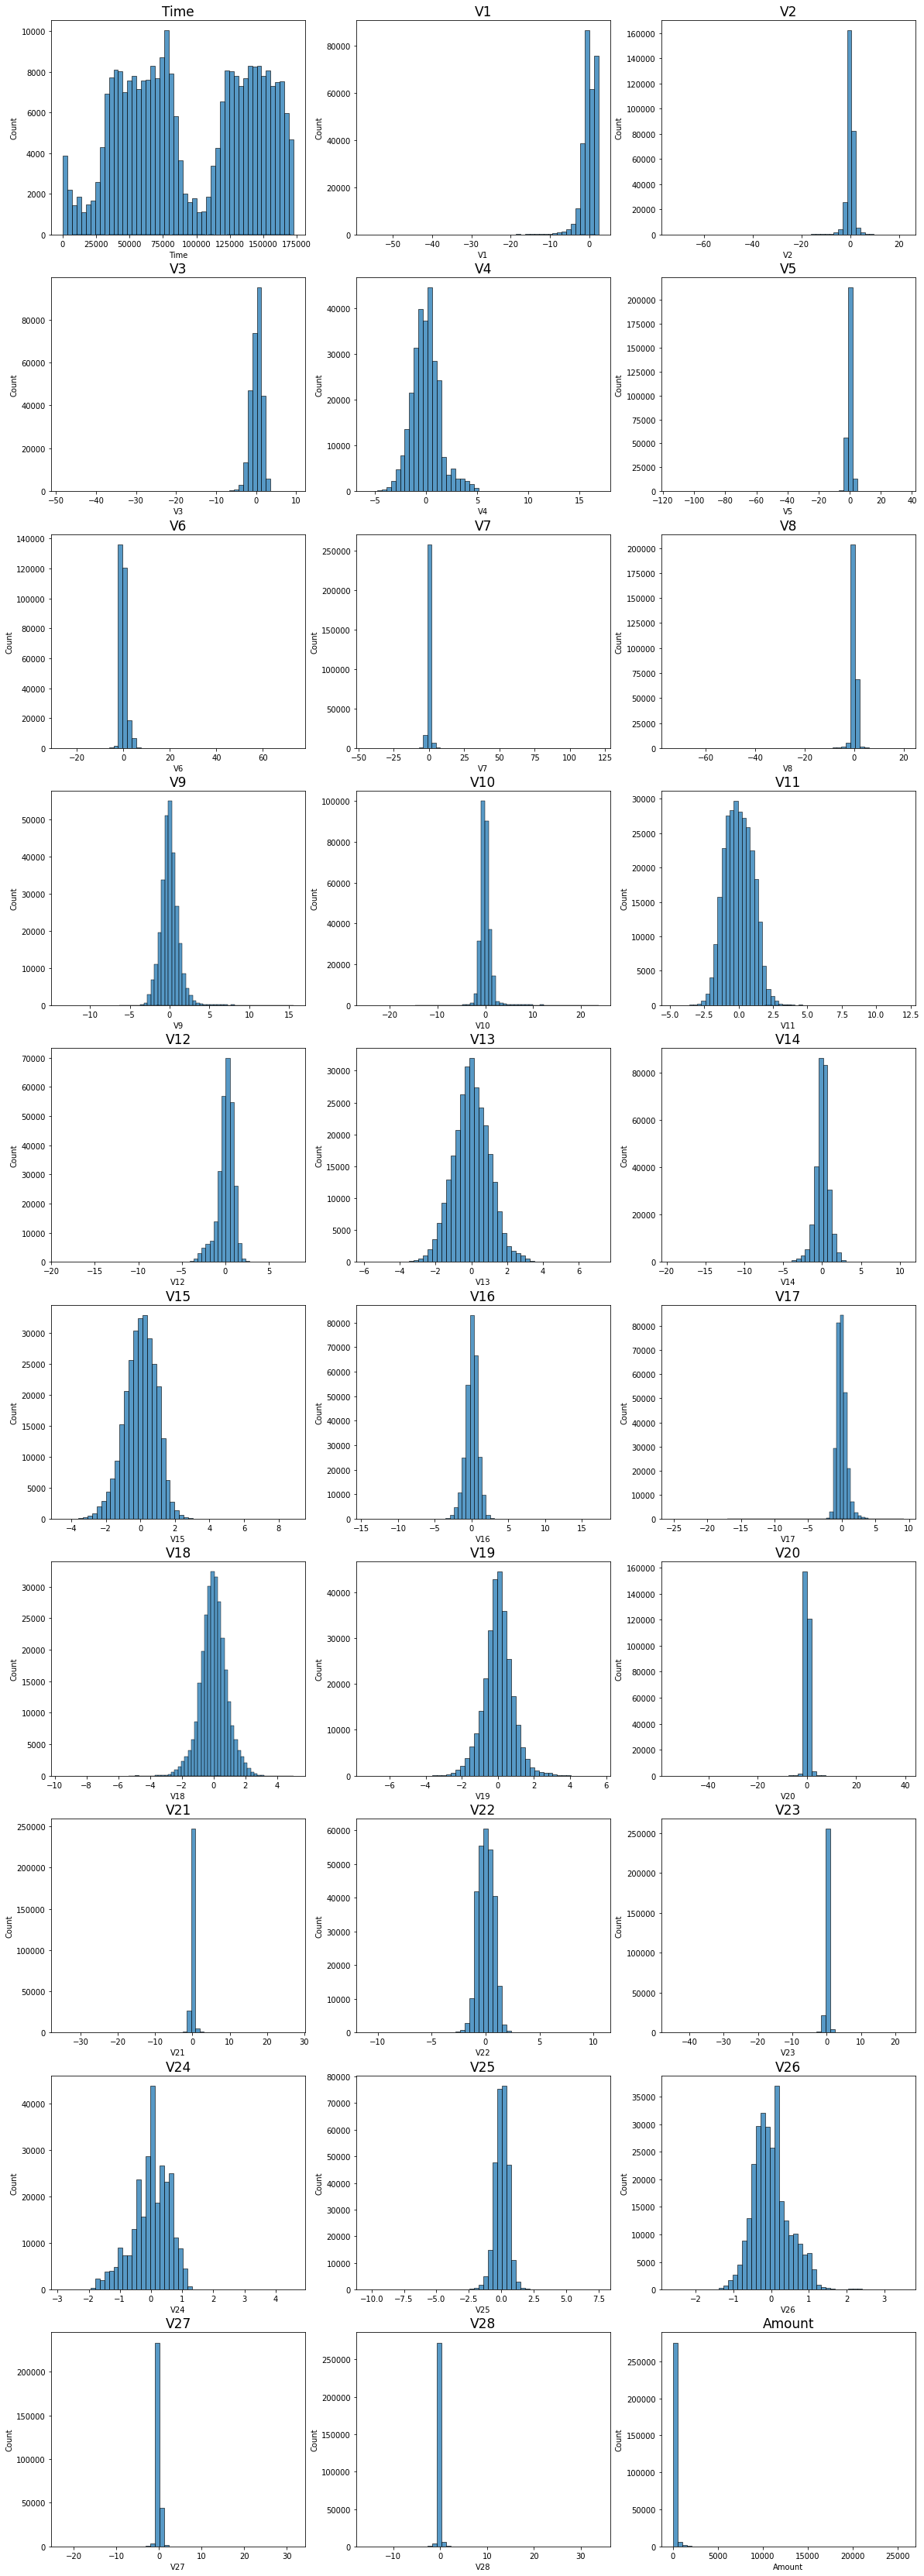

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(df[col][df.Class == 1], bins=50)
    sns.histplot(df[col][df.Class == 0], bins=50)
    plt.title(col, fontsize=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

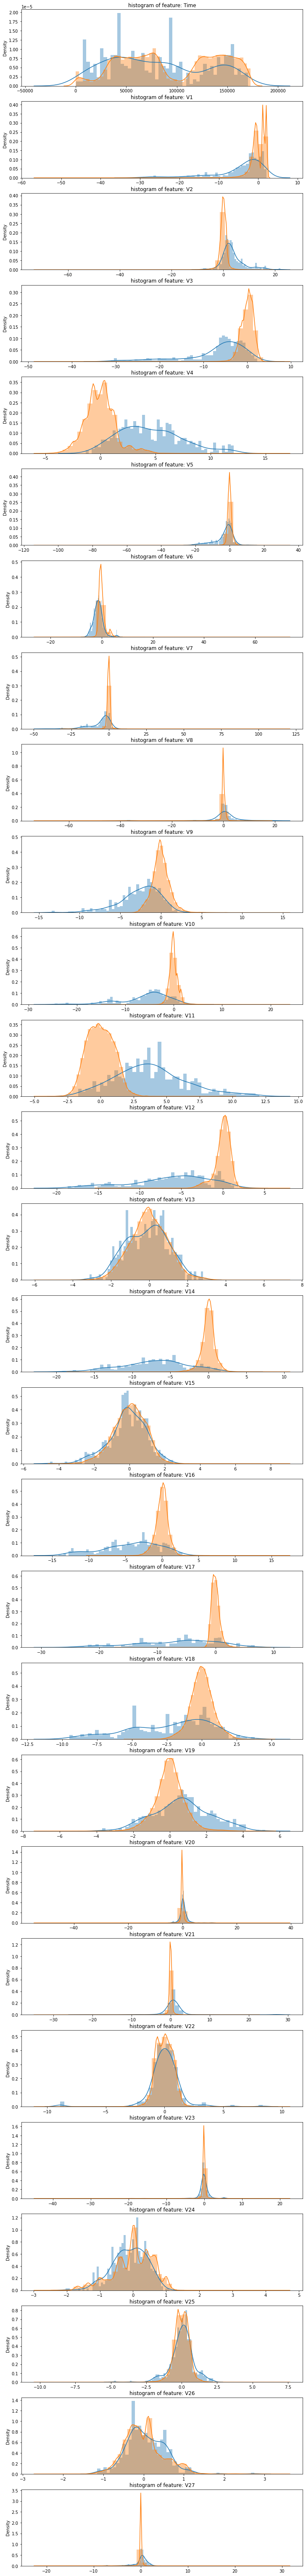

In [ ]:
# distribution of anomalous features
features = df.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(df[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(df[c][df.Class == 1], bins=50)
 sns.distplot(df[c][df.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [ ]:
# Determine number of fraud cases in dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

# print(f'Fraud Cases: {len(df[df['Class'] == 1])}')
# print(f'Valid Transactions: {len(df[df['Class'] == 0])}')

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
print('Amount details of fraudulent transaction')
Fraud.Amount.describe()

Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print('details of valid transaction')
Valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

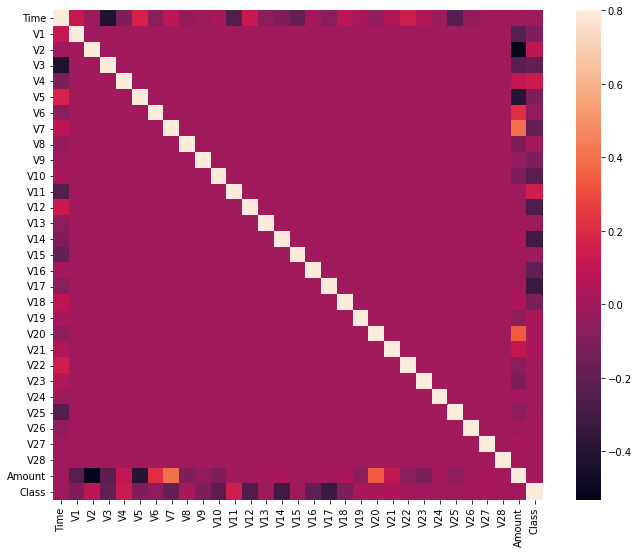

In [ ]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
df[['Time','Amount','Class']].groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                             Amount                                            \
            75%       max     count        mean         std  min   25%    50%   
Class                                                                           
0      139333.0  172792.0  284315.0   88.291022  250.105092  0.0  5.65  22.00   
1      128483.0  170348.0     492.0  122.211321  256.683288  0.0  1.00   9.25   

                         
          75%       max  
Class                    
0       77.05  25691.16  
1      105.89   2125.87

#### **Note :**
Looks like there is clear relationship between amount and Class. Averge of amount is high for the fraudelant transactions. Lets Do further analysis to understand more

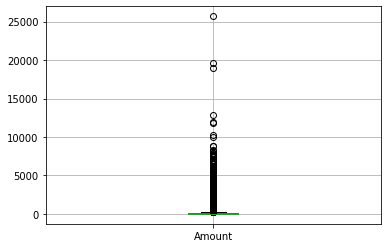

In [ ]:
df.boxplot('Amount')

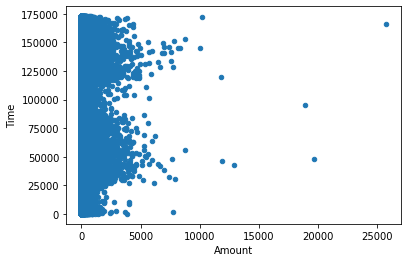

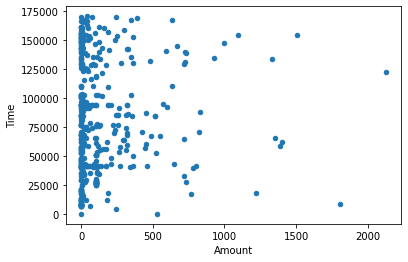

In [ ]:
df[df.Class == 0].plot.scatter('Amount','Time')
df[df.Class == 1].plot.scatter('Amount','Time')

In [ ]:
# There are 7 record in dataset the Ammount is greater than 10,000.00. 
# with scatterplot we can see all of these transactions are belongs to non-fraudelent as well
df = df.drop(df[df.Amount > 10000].index, axis=0)

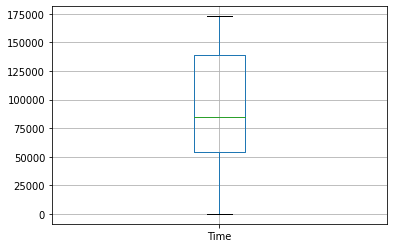

In [ ]:
df.boxplot('Time')

In [ ]:
# Handling Inbalance data.
counts = df.Class.value_counts()
print(counts)
print(f'legimate {(counts[0] / sum(counts))*100}% and Fraudent {(counts[1] / sum(counts))*100}%')

0    284308
1       492
Name: Class, dtype: int64
legimate 99.82724719101124% and Fraudent 0.17275280898876405%


In [ ]:
#dividing the X and the Y from the dataset
X=df.drop(['Class'], axis=1)
Y=df['Class']
print(X.shape)
print(Y.shape)

#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 30)
(284807,)


In [ ]:
X_data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

# **Preprocessing**

## **Feature Selection**

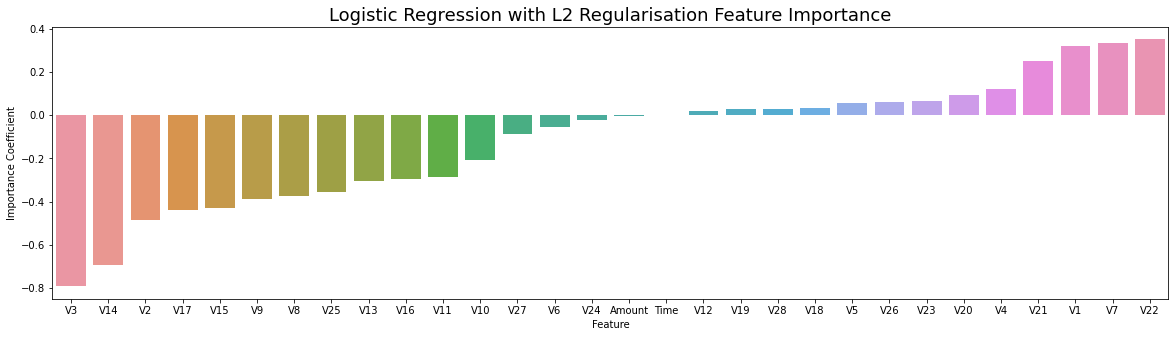

In [ ]:
reg_model = LogisticRegression(max_iter=200,random_state=12, solver='liblinear')
reg_model.fit(X,y)

# coefficient matrix
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(reg_model.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']
coefficients.sort_values(by='Importance Coefficient', inplace=True)

# Plotting coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

There are no sifnificant with ammount and time with class as expected. lets remove those columns

In [ ]:
X.drop(['Time','Amount'], axis=1, inplace=True)

**Summary of EDA**
- Data looks clean
- No null values
- Majority of features are well distributed around mean
- There are some corereated features. but not strong enough to drop
- Dataset is highly imbalanced.

**Resampling stratergy**
Dataset is highly imbalanced. Fraudulent transactions are only 0.17% from entire dataset. Direct oversampling or under sampling will not work for the dataset. Lest do mix of oversampling and under sampling to cover more data points from none-fraudulent than taking just 492 records out of 284308 samples.

1. Lets take random 5% from none-fraudulent transactions
2. Then will oversample fraudulent transactions to match with none-fraudulen

## **Resampling**

In [ ]:
# Since dataset is highly unbalanced we can use under sampling or mix of under and over sampling to increase number of samples
leg_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

no_of_samples = round(leg_df.shape[0] * 0.05)
no_of_samples

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

leg_df_2 = resample(leg_df, n_samples=no_of_samples, random_state=15)
# leg_df_2.describe()
df_sampled = pd.concat([leg_df_2,fraud_df],axis=0)

x_sampled = df_sampled.drop('Class', axis=1)
y_sampled = df_sampled.Class

ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(x_sampled, y_sampled)

In [ ]:
y.value_counts()

0    14215
1    14215
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)
y_train.value_counts(), y_test.value_counts()

(0    10661
 1    10661
 Name: Class, dtype: int64, 1    3554
 0    3554
 Name: Class, dtype: int64)

**Defining Evaluation criteria**

In [ ]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score


In [ ]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
    # save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [ ]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

In [ ]:
# Model

# Logistic Regression
# Logistic Regression CV
# Bernoulli Naive Bayes Classifier
# RandomForestClassifier
# BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
# XGBClassifier
# import tensorflow as tf

# **Train Model and Metrics Evaluating**

## **Model selection**

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_sm, test_size = 0.2, random_state = 0)

In [ ]:
# Define classier to a list
classifiers = [
    LogisticRegression(),        #1
    LogisticRegressionCV(),      #2
    RidgeClassifierCV(),         #14
    SVC(),                       #3
    KNeighborsClassifier(),      #4

    DecisionTreeClassifier(),    #5
    RandomForestClassifier(),    #6
    AdaBoostClassifier(),        #7
    ExtraTreesClassifier(),      #8
    GradientBoostingClassifier(),#9 
    BaggingClassifier(),         #10
    XGBClassifier(),             #11

    GaussianNB(),                #12
    BernoulliNB()                #13
    ]

In [ ]:
# Train data for each model
# Create dataframe for model performance result
model_performance = pd.DataFrame(columns=['Method', 'accuracy', 'precision', 'recall', 'f1-score'])

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    method = str(type(classifier)).split('.')[-1][:-2]

    # accuracy score
    acc = accuracy_score(y_test, y_pred)

    # precision score
    pre = precision_score(y_test, y_pred)

    # recall score
    re = recall_score(y_test, y_pred)

    # f1 score
    f1 = f1_score(y_test, y_pred)

    # Append model performance metrics to dataframe
    # evaluation_df = evaluation_df.append({
    model_performance = model_performance.append({
                    'Method':method,
                    'accuracy':acc,
                    'precision':pre,
                    'recall':re,
                    'f1-score':f1}, ignore_index=True)

In [ ]:
# Sort accuracy, precision, recall, and f2-score in descending order
model_performance.sort_values(['accuracy', 'precision', 'recall', 'f1-score'], ascending=False).reset_index(drop=True)

,Method,accuracy,precision,recall,f1-score
0,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
1,ExtraTreesClassifier,1.000000,1.000000,1.000000,1.000000
2,BaggingClassifier,0.998452,0.996914,1.000000,0.998455
3,DecisionTreeClassifier,0.996624,0.993292,1.000000,0.996635
4,XGBClassifier,0.993106,0.991034,0.995217,0.993121
5,GradientBoostingClassifier,0.991559,0.989905,0.993247,0.991573
6,AdaBoostClassifier,0.965532,0.980540,0.949916,0.964985
7,KNeighborsClassifier,0.958075,0.922638,1.000000,0.959762
8,LogisticRegressionCV,0.945132,0.970273,0.918402,0.943625
9,LogisticRegression,0.939645,0.965723,0.911649,0.937907


### **Isolation Forest Model**

In [ ]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [ ]:
#Building another model/classifier ISOLATION FOREST

ifc=IsolationForest(max_samples=len(X_train), contamination=outlier_fraction, random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

In [ ]:
# Evaluation
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()

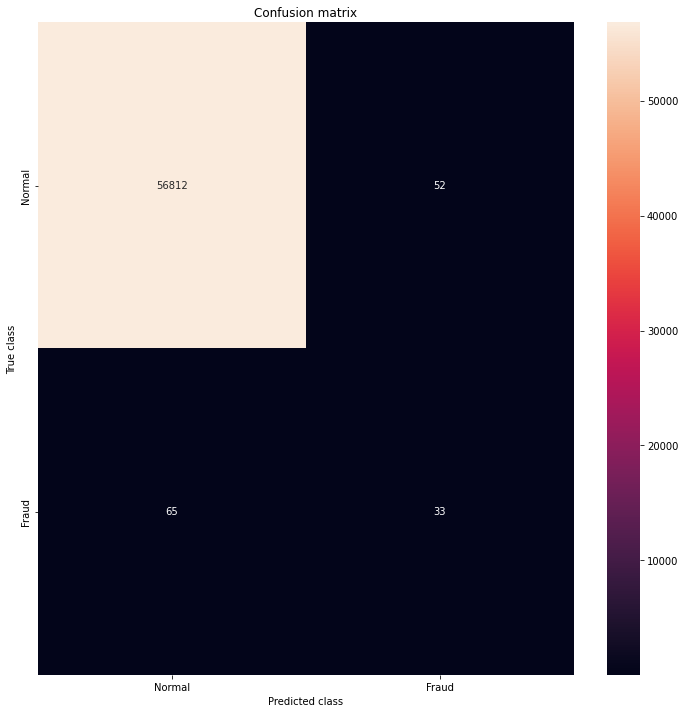

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# Evaluation of the model
# printing every score of the classifier
# scoring in any thing

dataset_name = 'Credit Card Fraud Detection base on Isolation forest: '
n_outliers = len(Fraud)
print('the Model used is {}'.format('Isolation Forest'))
acc = accuracy_score(Y_test, y_pred)
f1 =  f1_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred) 
recall = recall_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
confusion_metrix = confusion_matrix(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
MCC = matthews_corrcoef(Y_test,y_pred)

print(dataset_name,'test acc = ', acc)
print(dataset_name,'test f1-score = ', f1)
print(dataset_name,'test precision-score = ', precision)
print(dataset_name,'test recall-score = ', recall)
print(dataset_name,'test classification report')
print(class_report)
print(dataset_name,'test confusion metric')
print(confusion_metrix)
print(dataset_name,'test roc_auc = ',roc_auc)
print(f'The Matthews correlation coefficient is {MCC}')

the Model used is Isolation Forest
Credit Card Fraud Detection base on Isolation forest:  test acc =  0.9979459990871107
Credit Card Fraud Detection base on Isolation forest:  test f1-score =  0.36065573770491804
Credit Card Fraud Detection base on Isolation forest:  test precision-score =  0.38823529411764707
Credit Card Fraud Detection base on Isolation forest:  test recall-score =  0.336734693877551
Credit Card Fraud Detection base on Isolation forest:  test classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.34      0.36        98

    accuracy                           1.00     56962
   macro avg       0.69      0.67      0.68     56962
weighted avg       1.00      1.00      1.00     56962

Credit Card Fraud Detection base on Isolation forest:  test confusion metric
[[56812    52]
 [   65    33]]
Credit Card Fraud Detection base on Isolation forest:  test roc_auc =  0.6679

[0.66057898 0.34919542 0.33131437 0.33415794 0.32485806 0.34195626
 0.32333088 0.33262065 0.3298847  0.35612826]


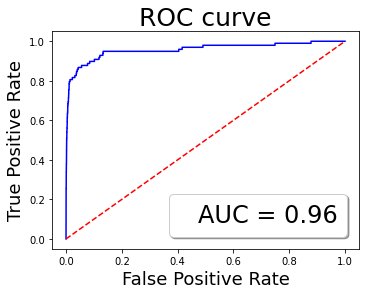

In [ ]:
plt.figure(figsize = (5.5, 4))

# y_pred_proba = ifc.predict_proba(X_test)
y_pred_proba = abs(ifc.score_samples(X_test))
print(y_pred_proba[:10])

fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
# fpr, tpr, _ = roc_curve(y_test, y_pred_prob_list)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=18)
plt.xlabel('False Positive Rate',fontsize=18)
plt.legend(loc = 'lower right', fontsize=24, fancybox=True, shadow=True, frameon=True, handlelength=0)
plt.show()

### **Random forest**

In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
# from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

# predictions
y_pred = rfc.predict(X_test)

In [ ]:
# Evaluation of the model
# printing every score of the classifier
# scoring in any thing

dataset_name = 'Credit Card Fraud Detection base on Random forest: '
n_outliers = len(Fraud)
print('the Model used is {}'.format('Random Forest'))
acc = accuracy_score(Y_test, y_pred)
f1 =  f1_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred) 
recall = recall_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
confusion_metrix = confusion_matrix(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
MCC = matthews_corrcoef(Y_test,y_pred)

print(dataset_name,'test acc = ', acc)
print(dataset_name,'test f1-score = ', f1)
print(dataset_name,'test precision-score = ', precision)
print(dataset_name,'test recall-score = ', recall)
print(dataset_name,'test classification report')
print(class_report)
print(dataset_name,'test confusion metric')
print(confusion_metrix)
print(dataset_name,'test roc_auc = ',roc_auc)
print(f'The Matthews correlation coefficient is {MCC}')

the Model used is Random Forest
Credit Card Fraud Detection base on Random forest:  test acc =  0.9995786664794073
Credit Card Fraud Detection base on Random forest:  test f1-score =  0.8636363636363635
Credit Card Fraud Detection base on Random forest:  test precision-score =  0.9743589743589743
Credit Card Fraud Detection base on Random forest:  test recall-score =  0.7755102040816326
Credit Card Fraud Detection base on Random forest:  test classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Credit Card Fraud Detection base on Random forest:  test confusion metric
[[56862     2]
 [   22    76]]
Credit Card Fraud Detection base on Random forest:  test roc_auc =  0.8877375162220206
The Matthews

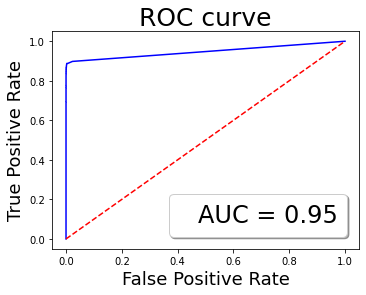

In [ ]:
plt.figure(figsize = (5.5, 4))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
# y_pred_proba = abs(ifc.score_samples(X_test))
# print(y_pred_proba[:10])

fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
# fpr, tpr, _ = roc_curve(y_test, y_pred_prob_list)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=18)
plt.xlabel('False Positive Rate',fontsize=18)
plt.legend(loc = 'lower right', fontsize=24, fancybox=True, shadow=True, frameon=True, handlelength=0)
plt.show()

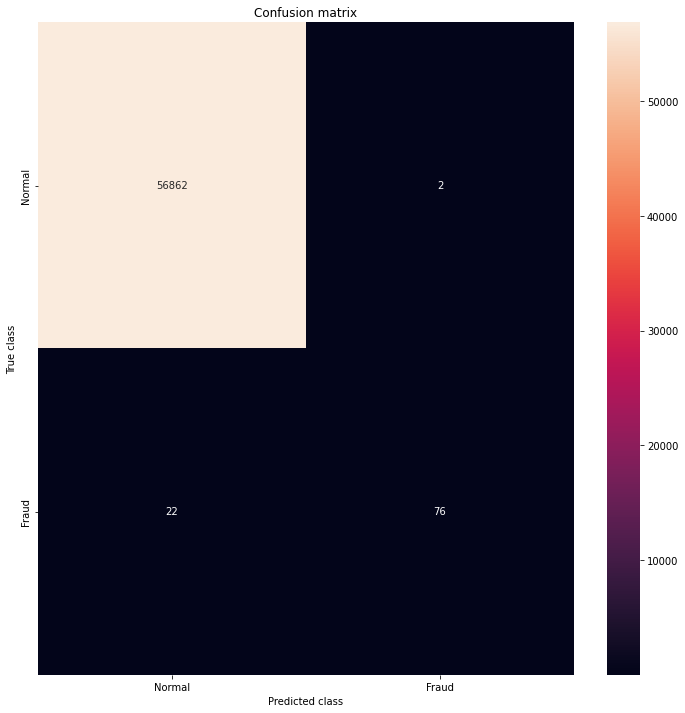

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

##### **Visualizing the Forest**

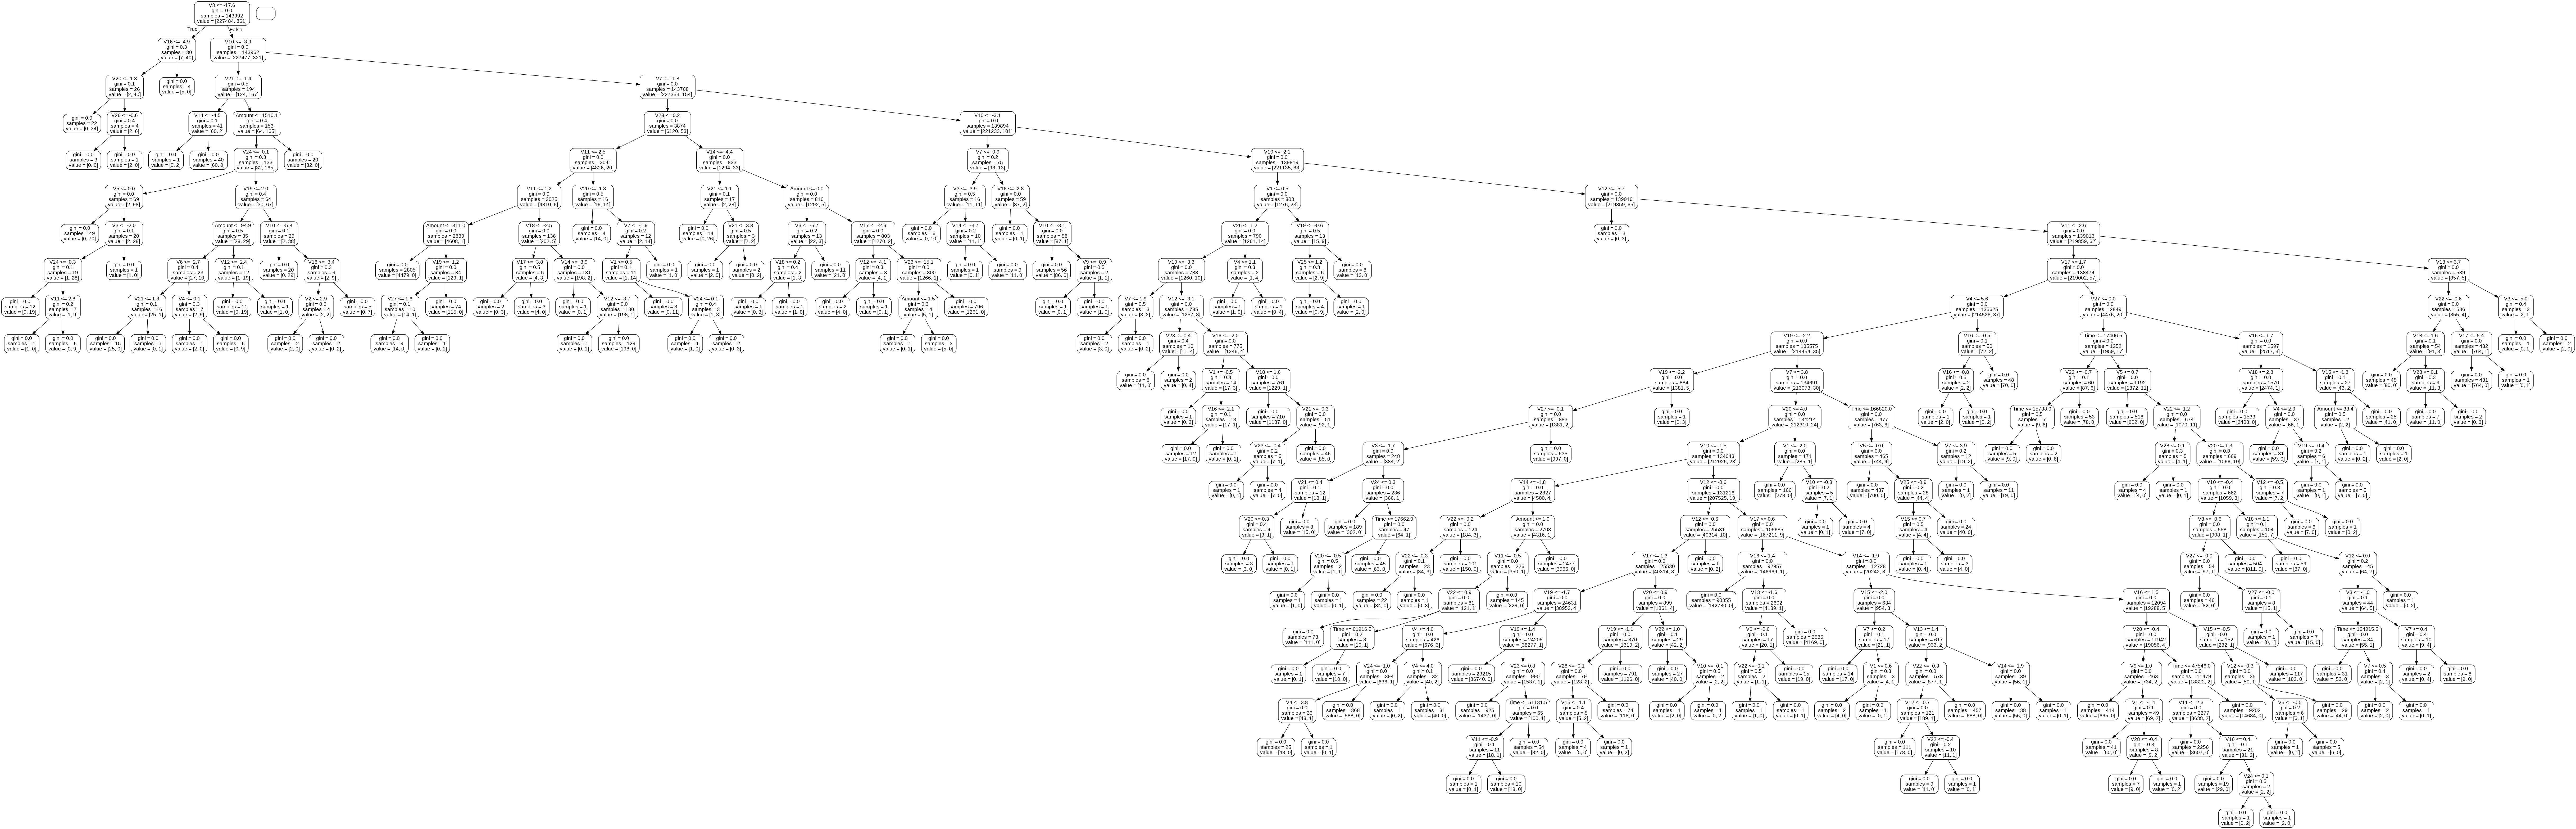

In [ ]:
#visualizing the random tree 
feature_list = list(X.columns)

# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
display(Image(graph.create_png()))

### **Logistic Regression**

Logistic Regression
--------------------------------------------------------------------------
accuracy score :0.9396454698930782
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3554
           1       0.97      0.91      0.94      3554

    accuracy                           0.94      7108
   macro avg       0.94      0.94      0.94      7108
weighted avg       0.94      0.94      0.94      7108



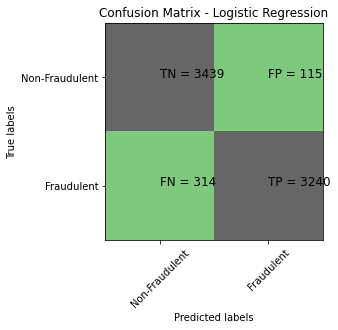

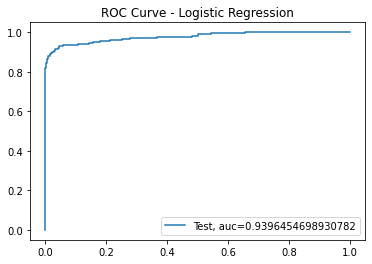

In [ ]:
lr_model = LogisticRegression(max_iter=200,random_state=12)
lr_model.fit(X_train,y_train)
pred1 = lr_model.predict(X_test)
prob1 = lr_model.predict_proba(X_test)
print_results("Logistic Regression", y_test, pred1,prob1[:,-1])

Logistic Regression CV
--------------------------------------------------------------------------
accuracy score :0.9424592009003939
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3554
           1       0.98      0.91      0.94      3554

    accuracy                           0.94      7108
   macro avg       0.94      0.94      0.94      7108
weighted avg       0.94      0.94      0.94      7108



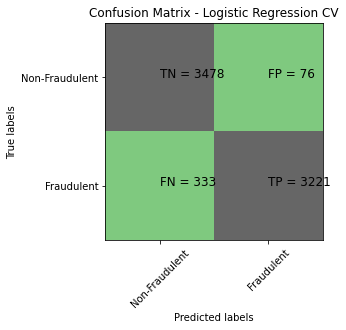

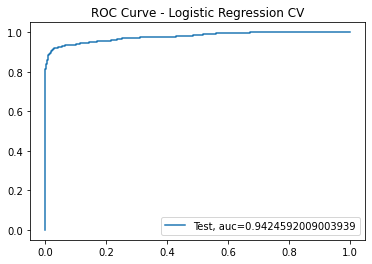

In [ ]:
cv_num = KFold(n_splits=10, shuffle=True, random_state=12)
lr_modelCV = LogisticRegressionCV(max_iter=200,penalty='l2',scoring='roc_auc',cv=cv_num,tol=10,random_state=12)
lr_modelCV.fit(X_train,y_train)
pred2 = lr_modelCV.predict(X_test)
prob2 = lr_modelCV.predict_proba(X_test)
print_results("Logistic Regression CV", y_test, pred2,prob2[:,-1])

### **Logistic Regression CV**

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301


### **Bernoulli Naive Bayes Classifier**

Bernoulli Naive Bayes
--------------------------------------------------------------------------
accuracy score :0.9006752954417557
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3554
           1       0.99      0.81      0.89      3554

    accuracy                           0.90      7108
   macro avg       0.91      0.90      0.90      7108
weighted avg       0.91      0.90      0.90      7108



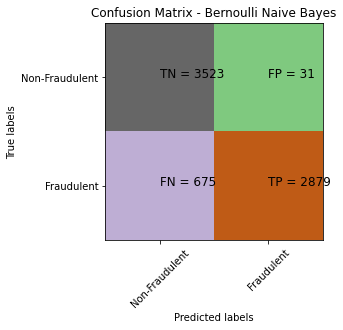

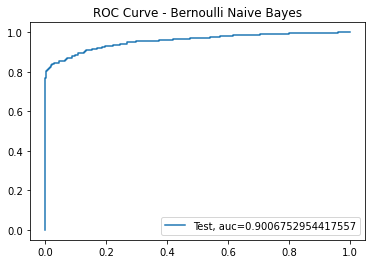

In [ ]:
gnb_model = BernoulliNB()
gnb_model.fit(X_train,y_train)
pred3 = gnb_model.predict(X_test)
prob3 = gnb_model.predict_proba(X_test)
print_results("Bernoulli Naive Bayes", y_test, pred3,prob3[:,-1])

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780


### **Random Forest Classifier**

Random Forest Classifier + gini
--------------------------------------------------------------------------
accuracy score :1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



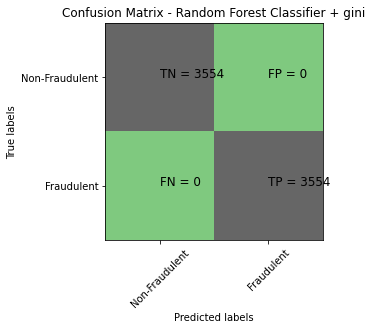

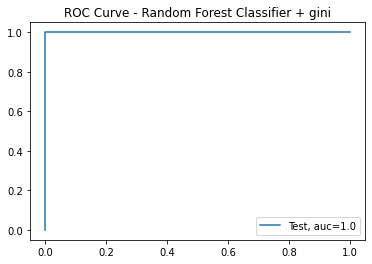

Random Forest Classifier + entropy 
--------------------------------------------------------------------------
accuracy score :1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



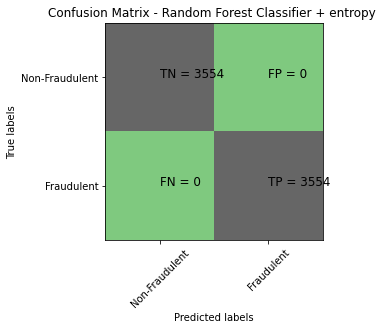

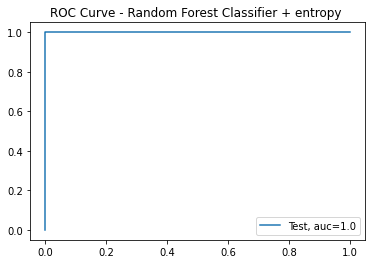

In [ ]:
rfc_model = RandomForestClassifier(bootstrap = True,
                                max_features = 'sqrt', random_state=12)
rfc_model.fit(X_train,y_train)
pred5 = rfc_model.predict(X_test)
prob5 = rfc_model.predict_proba(X_test)
print_results("Random Forest Classifier + gini", y_test, pred5,prob5[:,-1])

rfc_model2 = RandomForestClassifier(bootstrap = True,criterion='entropy',max_features = 'sqrt', random_state=12)
rfc_model2.fit(X_train,y_train)
pred6 = rfc_model2.predict(X_test)
prob6 = rfc_model2.predict_proba(X_test)
print_results("Random Forest Classifier + entropy ", y_test, pred6,prob6[:,-1])

### **Bagging Classifier**

Bagging Classifier
--------------------------------------------------------------------------
accuracy score :0.9998593134496342
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



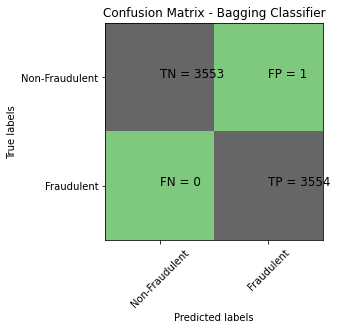

In [ ]:
bcf_model = BaggingClassifier(DecisionTreeClassifier(),
                              n_estimators=200,
                              max_samples=0.8,
                              max_features=0.8,
                              oob_score=True,
                              random_state=12)
bcf_model.fit(X_train,y_train)
pred2 = bcf_model.predict(X_test)
print_results("Bagging Classifier", y_test, pred2)

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Bagging Classifier,0.999859,0.999719,1.000000,0.999859


### **GradientBoosting Classifier** 

Gradient Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.9929656724817107
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3554
           1       0.99      1.00      0.99      3554

    accuracy                           0.99      7108
   macro avg       0.99      0.99      0.99      7108
weighted avg       0.99      0.99      0.99      7108



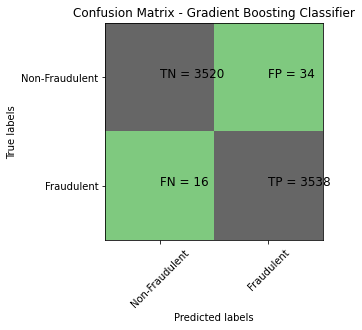

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
pred = gbc_model.predict(X_test)
pred_prob = gbc_model.predict_proba(X_test)
print_results("Gradient Boosting Classifier", y_test, pred)

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Bagging Classifier,0.999859,0.999719,1.000000,0.999859
6,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983


### **XGBOOSTING Classifier**

Gradient Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.9929656724817107
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3554
           1       0.99      1.00      0.99      3554

    accuracy                           0.99      7108
   macro avg       0.99      0.99      0.99      7108
weighted avg       0.99      0.99      0.99      7108



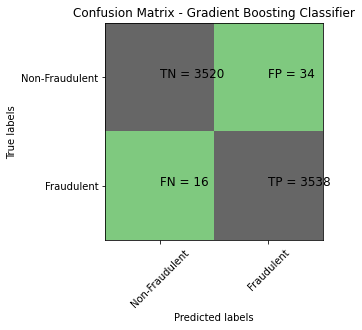

In [ ]:
cv = KFold(n_splits=10, random_state=12, shuffle=True)
model = XGBClassifier(cv=cv,learning_rate=0.01)

gbc_model.fit(X_train,y_train)
pred = gbc_model.predict(X_test)
pred_prob = gbc_model.predict_proba(X_test)
print_results("Gradient Boosting Classifier", y_test, pred)

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Bagging Classifier,0.999859,0.999719,1.000000,0.999859
6,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
7,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983


### **Artificial Neural Network Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape=[30]))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))

    model.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = create_model()
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
early_stopping = EarlyStopping(patience = 20, min_delta = 0.001, restore_best_weights =True )

In [ ]:
scaller = StandardScaler()

x_train_scaled = scaller.fit_transform(X_train)
x_test_scaled = scaller.transform(X_test)

In [ ]:
history  = classifier.fit(x_train_scaled,
                          y_train,
                          epochs=500,
                          validation_split=0.25,
                          callbacks=[early_stopping],
                          verbose=1)

Epoch 1/500
500/500 [==============================] - 5s 8ms/step - loss: 0.1561 - accuracy: 0.9463 - val_loss: 0.1109 - val_accuracy: 0.9599
Epoch 2/500
500/500 [==============================] - 5s 10ms/step - loss: 0.0808 - accuracy: 0.9692 - val_loss: 0.0584 - val_accuracy: 0.9792
Epoch 3/500
500/500 [==============================] - 5s 10ms/step - loss: 0.0539 - accuracy: 0.9809 - val_loss: 0.0344 - val_accuracy: 0.9904
Epoch 4/500
500/500 [==============================] - 6s 12ms/step - loss: 0.0396 - accuracy: 0.9860 - val_loss: 0.0302 - val_accuracy: 0.9893
Epoch 5/500
500/500 [==============================] - 3s 6ms/step - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.0258 - val_accuracy: 0.9912
Epoch 6/500
500/500 [==============================] - 2s 5ms/step - loss: 0.0226 - accuracy: 0.9916 - val_loss: 0.0210 - val_accuracy: 0.9940
Epoch 7/500
500/500 [==============================] - 2s 5ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0313 - val_accuracy: 0.9

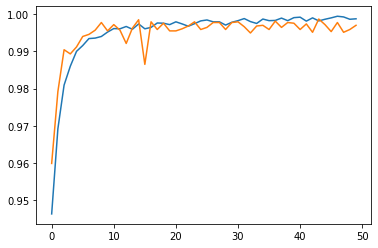

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
y_pred = classifier.predict(x_test_scaled)

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5 :
        y_pred[i] = 1
    else:
        y_pred[i] = 0

ANN 
--------------------------------------------------------------------------
accuracy score :0.9990151941474396
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



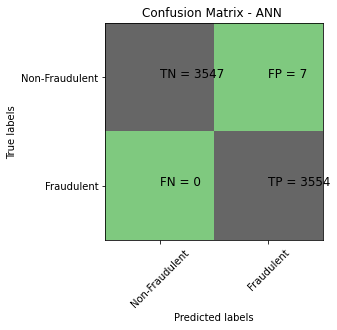

In [ ]:
print_results("ANN ", y_test, y_pred)

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Bagging Classifier,0.999859,0.999719,1.000000,0.999859
6,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
7,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
8,ANN,0.999015,0.998034,1.000000,0.999016


## **Conclusion**
Accuracy and F1-Score for this Random Forest Classifier + gini and Random Forest Classifier + entropy is almost 1 %. its almost perfect and no need to finetune more. accuracy score,	Precision,	Recall,	f1_score near 1  
our Random Forest result in most cases exceeds the previously reported results with a Matthews Correlation Coefficient of 0.8691. Other performance characteristics are also satisfactory so now we don’t need to apply some other model to this.  

  As you can clearly see that our model or any model, in general, have a low Recall Value, which is precisely the reason why you get harassed by so many confirmation messages after a transaction. But with more and more advancements in Machine Learning Models, we are slowly but steadily dealing with that problem without compromising your account’s security.  

The model is fast, it is definitely simple and most importantly easily interpretable as shown in the Decision Tree diagram. The privacy of the user is still intact, as the data used had its dimensionality reduced in the beginning. Well, we still have not managed to deal with the unbalancing of data, but I think we have done pretty fine without it. It is, actually a big milestone covered for all of us. There is and will always be a long way to go but this sounds like a good start to me. Hope you enjoyed reading this article as much as I enjoyed writing it. Honestly, I was a bit skeptical about it at first, especially when the Isolation Forest did not produce a good result but now having seen the result from the Random Forest, I am feeling pretty gratified after finishing it with this kind of result.


In [ ]:
evaluation_df.sort_values(['accuracy score', ' Precision', 'Recall', 'f1_score'], ascending=False).reset_index(drop=True)

,Model,accuracy score,Precision,Recall,f1_score
0,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
1,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
2,Bagging Classifier,0.999859,0.999719,1.000000,0.999859
3,ANN,0.999015,0.998034,1.000000,0.999016
4,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
5,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
6,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
7,Logistic Regression,0.939645,0.965723,0.911649,0.937907
8,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
